# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     | André Esteban Vera  |
| **Fecha**      | 31/08/2025  |
| **Expediente** | 745232  |

## Regresión polinomial

Observa la siguiente gráfica.

In [11]:
# Librerías

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

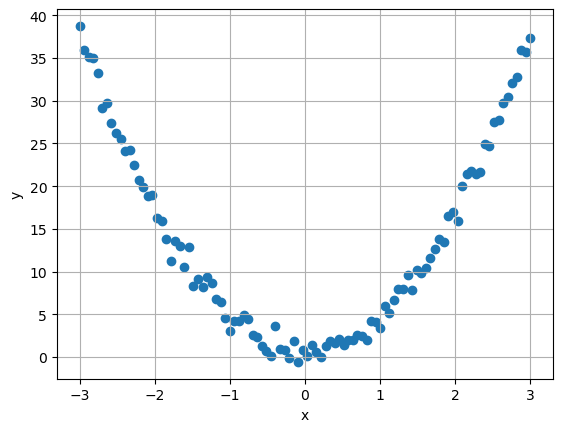

In [12]:
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.show()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [13]:
X1 = x.reshape(-1,1)
lr1 = LinearRegression().fit(X1, y)
y_lr1 = lr1.predict(X1)
r2_1 = r2_score(y,y_lr1)
print(f"B0={lr1.intercept_}")
print(f"B1={lr1.coef_[0]}")
print(f"r2={r2_1}")

B0=13.30223225795873
B1=-0.049554477435906644
r2=5.80345273922811e-05


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

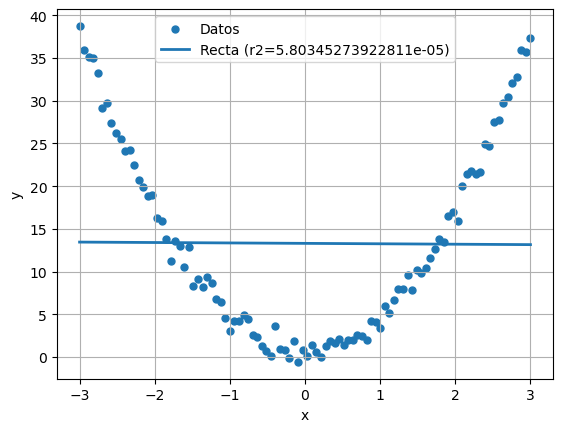

In [14]:
x_plot = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
y_plot_lr1 = lr1.predict(x_plot)

plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y, s=25, label="Datos"); plt.grid(True)
plt.plot(x_plot, y_plot_lr1, label=f"Recta (r2={r2_1})", linewidth=2)
plt.legend(); plt.show()

In [15]:
print(f"r2(lineal) = {r2_1}")


r2(lineal) = 5.80345273922811e-05


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [ ]:
poly2 = PolynomialFeatures(2, include_bias=False)
X2 = poly2.fit_transform(X1)
lr2 = LinearRegression().fit(X2, y)
y2 = lr2.predict(X2)
r2_2 = r2_score(y, y2)
print(f"B0={lr2.intercept_} --- coefs={lr2.coef_}")
print(f"Grado 2 : r2={r2_2}") 

B0=0.619420963180481 --- coefs=[-0.04955448  4.14388884]
Grado 2 : r2=0.9934118040713642


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

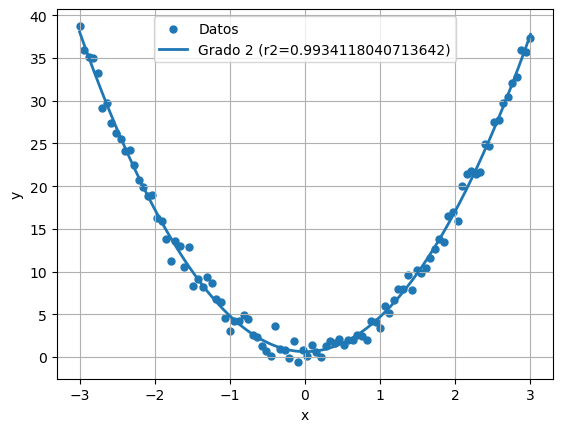

In [18]:
y2_plot = lr2.predict(poly2.transform(x_plot))
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y, s=25, label="Datos"); plt.grid(True)
plt.plot(x_plot, y2_plot, label=f"Grado 2 (r2={r2_2})", linewidth=2)
plt.legend(); plt.show()


**OBSERVACIONES**

Podemos ver que el modelo mejora drasticamente, visualmente la regresión se acerca mucho más a los puntos y con el coeficiente de determinación (r2) confirmamos queel modelo es muy bueno.

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [19]:
poly3 = PolynomialFeatures(3, include_bias=False); X3 = poly3.fit_transform(X1)
lr3 = LinearRegression().fit(X3, y); y3 = lr3.predict(X3); r2_3 = r2_score(y, y3)

poly5 = PolynomialFeatures(5, include_bias=False); X5 = poly5.fit_transform(X1)
lr5 = LinearRegression().fit(X5, y); y5 = lr5.predict(X5); r2_5 = r2_score(y, y5)

poly7 = PolynomialFeatures(7, include_bias=False); X7 = poly7.fit_transform(X1)
lr7 = LinearRegression().fit(X7, y); y7 = lr7.predict(X7); r2_7 = r2_score(y, y7)

poly9 = PolynomialFeatures(9, include_bias=False); X9 = poly9.fit_transform(X1)
lr9 = LinearRegression().fit(X9, y); y9 = lr9.predict(X9); r2_9 = r2_score(y, y9)

poly11 = PolynomialFeatures(11, include_bias=False); X11 = poly11.fit_transform(X1)
lr11 = LinearRegression().fit(X11, y); y11 = lr11.predict(X11); r2_11 = r2_score(y, y11)

print(f"Grado 3  r2={r2_3}")
print(f"Grado 5  r2={r2_5}")
print(f"Grado 7  r2={r2_7}")
print(f"Grado 9  r2={r2_9}")
print(f"Grado 11 r2={r2_11}")


Grado 3  r2=0.9934129585186598
Grado 5  r2=0.9934954953676421
Grado 7  r2=0.9935089341876935
Grado 9  r2=0.9935141799662259
Grado 11 r2=0.9935338704150221


Crea una gráfica por cada modelo con las observaciones y su curva.

In [20]:
y3_plot  = lr3.predict(poly3.transform(x_plot))
y5_plot  = lr5.predict(poly5.transform(x_plot))
y7_plot  = lr7.predict(poly7.transform(x_plot))
y9_plot  = lr9.predict(poly9.transform(x_plot))
y11_plot = lr11.predict(poly11.transform(x_plot))

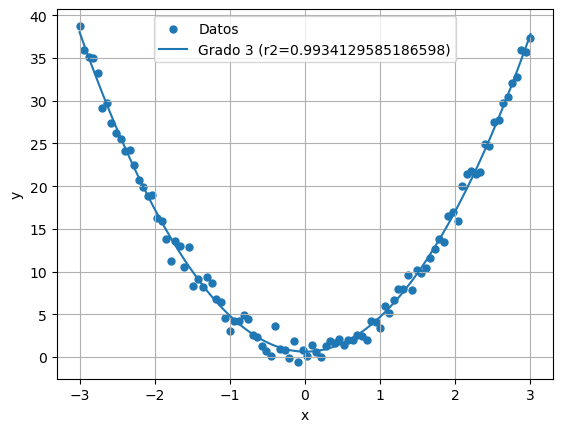

In [ ]:
# Grado 3
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y, s=25, label="Datos"); plt.grid(True)
plt.plot(x_plot, y3_plot, label=f"Grado 3 (r2={r2_3})")
plt.legend(); plt.show()

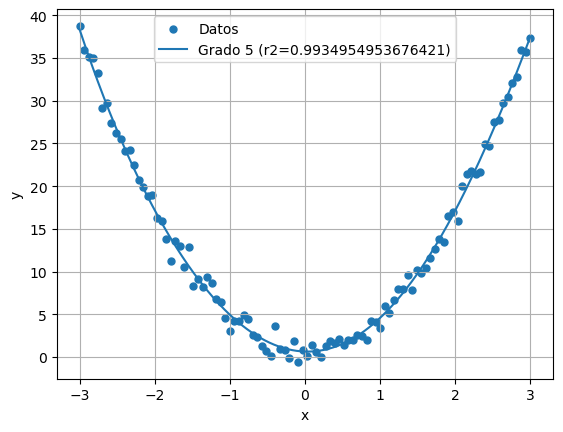

In [ ]:
# Grado 5
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y, s=25, label="Datos"); plt.grid(True)
plt.plot(x_plot, y5_plot, label=f"Grado 5 (r2={r2_5})")
plt.legend(); plt.show()


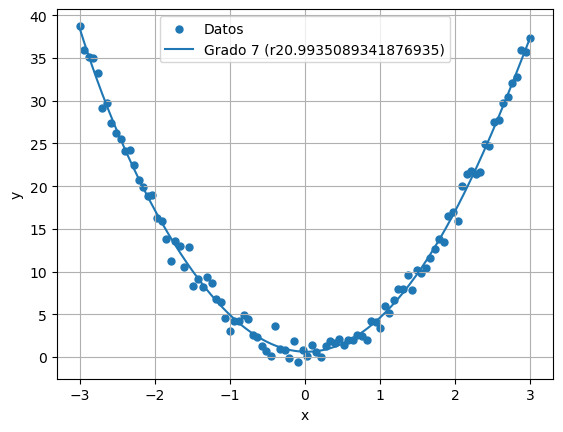

In [23]:
# Grado 7
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y, s=25, label="Datos"); plt.grid(True)
plt.plot(x_plot, y7_plot, label=f"Grado 7 (r2{r2_7})")
plt.legend(); plt.show()


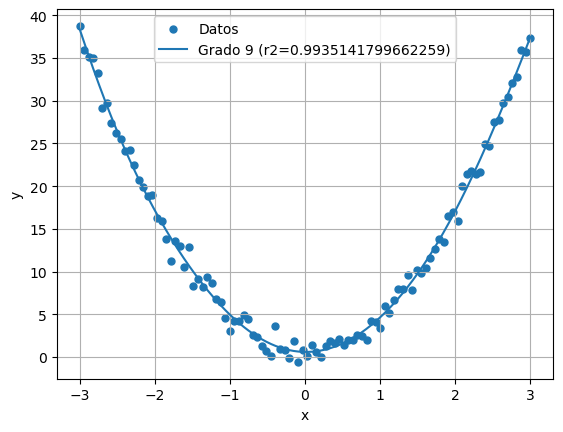

In [24]:
# Grado 9
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y, s=25, label="Datos"); plt.grid(True)
plt.plot(x_plot, y9_plot, label=f"Grado 9 (r2={r2_9})")
plt.legend(); plt.show()

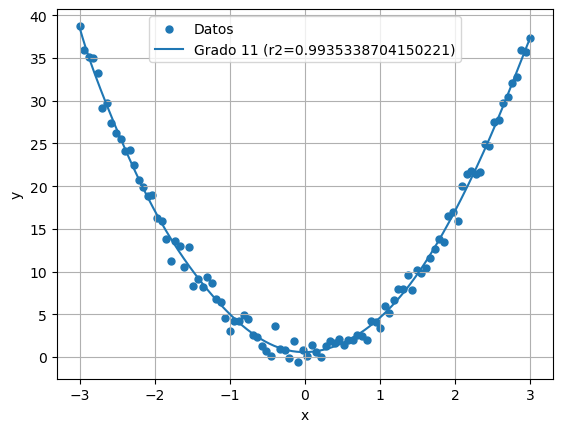

In [25]:
# Grado 11
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y, s=25, label="Datos"); plt.grid(True)
plt.plot(x_plot, y11_plot, label=f"Grado 11 (r2={r2_11})")
plt.legend(); plt.show()


**¿Cuál modelo consideras que es mejor? ¿Por qué?**

Al ajustar con un modelo cuadrático empezamos a capturar la forma verdadera de la gráfica y nos pudimos acercar mucho más con esa regresión a los datos reales, y a partir de ahí, cada regresión polinomial fue bastante buena y acertada, mientras subíamos el grado se acercaba un poco más, pero muy poco, solo subieron decimas del coeficiente de determinación. 
El grado 11 resultó con el mejor r2 porque el modelo es muy flexible y captura también el ruido (sobreajuste)

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [26]:
x0 = np.array([[5.0]])
yhat_2  = lr2.predict(poly2.transform(x0))[0]
yhat_3  = lr3.predict(poly3.transform(x0))[0]
yhat_5  = lr5.predict(poly5.transform(x0))[0]
yhat_7  = lr7.predict(poly7.transform(x0))[0]
yhat_9  = lr9.predict(poly9.transform(x0))[0]
yhat_11 = lr11.predict(poly11.transform(x0))[0]

tabla_pred = pd.DataFrame({
    'Grado':[2,3,5,7,9,11],
    'y_hat(x=5)':[yhat_2,yhat_3,yhat_5,yhat_7,yhat_9,yhat_11]
}).set_index('Grado')
print(tabla_pred)

        y_hat(x=5)
Grado             
2       103.968870
3       104.252324
5        84.598950
7        33.743218
9       215.736379
11    -5265.344254


Los polinomios de grado alto dieron valores poco razonables en x = 5 porque esa x está fuera del rango observado y entonces los polinimios se disparan, con grados grandes aparecen potencias enormas y la curva se dispara a valores absurdos.

¿Cuál modelo crees que sea mejor?

Yo creo que el mejor modelo en este caso es el de grado 2 ya que se ajusta sumamente bien a la relación x-y sin inflar la complejidad inecesariamente, siguiendo el principio de usar el modelo más simple posible que explique bien los datos.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3